In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("./csvfiles/mldata/Classified Data.csv",index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [3]:
y = df['TARGET CLASS']
x = df.drop('TARGET CLASS', axis=1)

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split\
(x,y,test_size=0.2, random_state=111)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)

In [6]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [7]:
predictions = knn.predict(x_test)

In [8]:
from sklearn.metrics import classification_report

In [9]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        97
           1       0.93      0.91      0.92       103

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200



In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [13]:
scaler.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [14]:
scaler.transform(x)

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [20]:
x = scaler.fit_transform(x)

In [15]:
x_train, x_test,y_train, y_test = train_test_split\
(x,y,test_size=0.2,random_state=777)

In [16]:
accs = []
for i in range(1, 101):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    acc = knn.score(x_test, y_test)
    accs.append(acc)

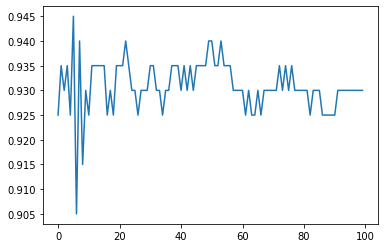

In [18]:
plt.plot(range(len(accs)), accs)

In [19]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
preds = knn.predict(x_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92        93
           1       0.92      0.95      0.94       107

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200

